# Задание на лабораторную работу №2. Pandas и основы python
## Общее задание
1. Сгенерировать с использованием библиотеки pandas csv файл, содержащий 3 столбца: $x_1$, $x_2$, $y$ (> 400 строк, генерация с использованием функции linspace). Вид функции определяется вариантом (диапазон выбирается студентом).
2. Открыть файл с использованием библиотеки pandas и построить графики: $y(x_1)$ ($x_2$ - константа), $y(x_2)$  ($x_1$ - константа). Графики необходимо построить с использованием matplotlib (для функции y отобразить точки на графике). 
3. Вывести для каждого столбца $(x_1, x_2, y)$: среднее, минимальное и максимальное значения.
4. Сохранить в новый csv файл те строки, для которых выполняется условие: $x_1$ меньше среднее $x_1$ или $x_2$ меньше среднее $x_2$
5. С использованием mplot3D построить 3D график функции $y(x_1, x_2)$ в отдельном окне.

## Варианты
1. $y = sin(x_1 + x_2)$
2. $y = cos(x_1 + x_2)$
3. $y = tan(x_1 + x_2) * sin(x_1)$
4. $y = 2 * x_1^2 + 3x_2^2$
5. $y = 5 * log(x_1) * log(2 * x_2)$
6. $y = 5 * log(x_1) * x_2^2$
7. $y = cos(x_1) * x_2^3$
8. $y = \frac{3}{(2 + e^{-2x})}$
9. $y = cos(x_1 + x_2) * x_2 ^ 2$
10. $y = \frac{x_2}{(1 + e^{-x_1})}$
11. $y = \frac{3 * x_1}{(1 - e^{-x_2})}$
12. $y = 0.01 * tan(x_1) * x_2^2$
13. $y = x_1^6 + x_2^2 + x_1^3 + 4x_2 + 5$
14. $y = cos(x_1) * x_2^3$
15. $y = tan(x_1) * ctg(x_2)$
16. $y = \frac{sin(x_1)}{(1 + e^{-2x_2})}$
17. $y = \frac{cos(x_1)}{(1 + e^{-2x_1})}$
18. $y = \frac{tan(x_1)}{(3 + e^{-2x_2})}$
19. $y = \frac{ctg(x_1)}{(2 + e^{-2x_2})}$
20. $y = \frac{x_1^2}{(1 + e^{-2x_2})}$


## Вариант 20
$y = \frac{x_1^2}{(1 + e^{-2x_2})}$

In [2]:
# %matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Task 1

In [3]:
x1 = np.linspace(-1, 1, 500)
x2 = np.linspace(-1, 1, 500)

x1, x2 = np.meshgrid(x1, x2)
y = (x1 ** 2) / (1 + np.exp(-2 * x2))

df = pd.DataFrame({'x1': x1.ravel(), 'x2': x2.ravel(), 'y': y.ravel()}) 

df.to_csv("graph.csv")

## Task 2

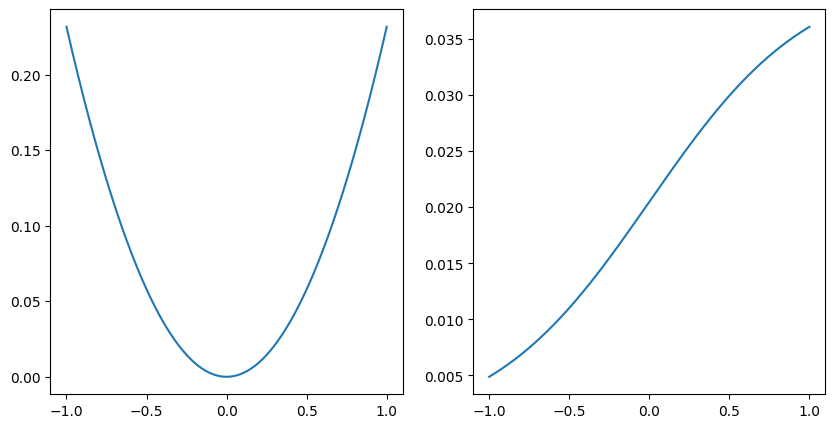

In [13]:
df = pd.read_csv("graph.csv")
 
x1 = df['x1'].values.reshape(x1.shape)
x2 = df['x2'].values.reshape(x2.shape)
y = df['y'].values.reshape(y.shape)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

x2_const = 100
ax[0].plot(x1[x2_const, :], y[x2_const, :])

x1_const = 300
ax[1].plot(x2[:, x1_const], y[:, x1_const])

plt.show()

## Task 3

In [17]:
for col in df.columns[1:]:
    print(f"name: {col}    avg: {df[col].mean()}   min: {df[col].min()}    max: {df[col].max()}")

name: x1    avg: -7.770495358272455e-17   min: -1.0    max: 1.0
name: x2    avg: -3.637978807091713e-17   min: -1.0    max: 1.0
name: y    avg: 0.16733466933867724   min: 4.787246718772398e-07    max: 0.8807970779778823


## Task 4

In [18]:
condition = (df['x1'] < df['x1'].mean()) | (df['x2'] < df['x2'].mean())
filtered_df = df[condition]
filtered_df.to_csv("filtered_graph.csv")

## Task 5

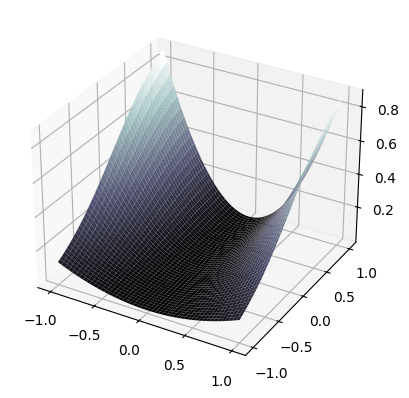

In [14]:
ax = plt.axes(projection='3d')
ax.plot_surface(x1, x2, y, cmap='bone')